1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('assets/voice.csv')

In [69]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [70]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

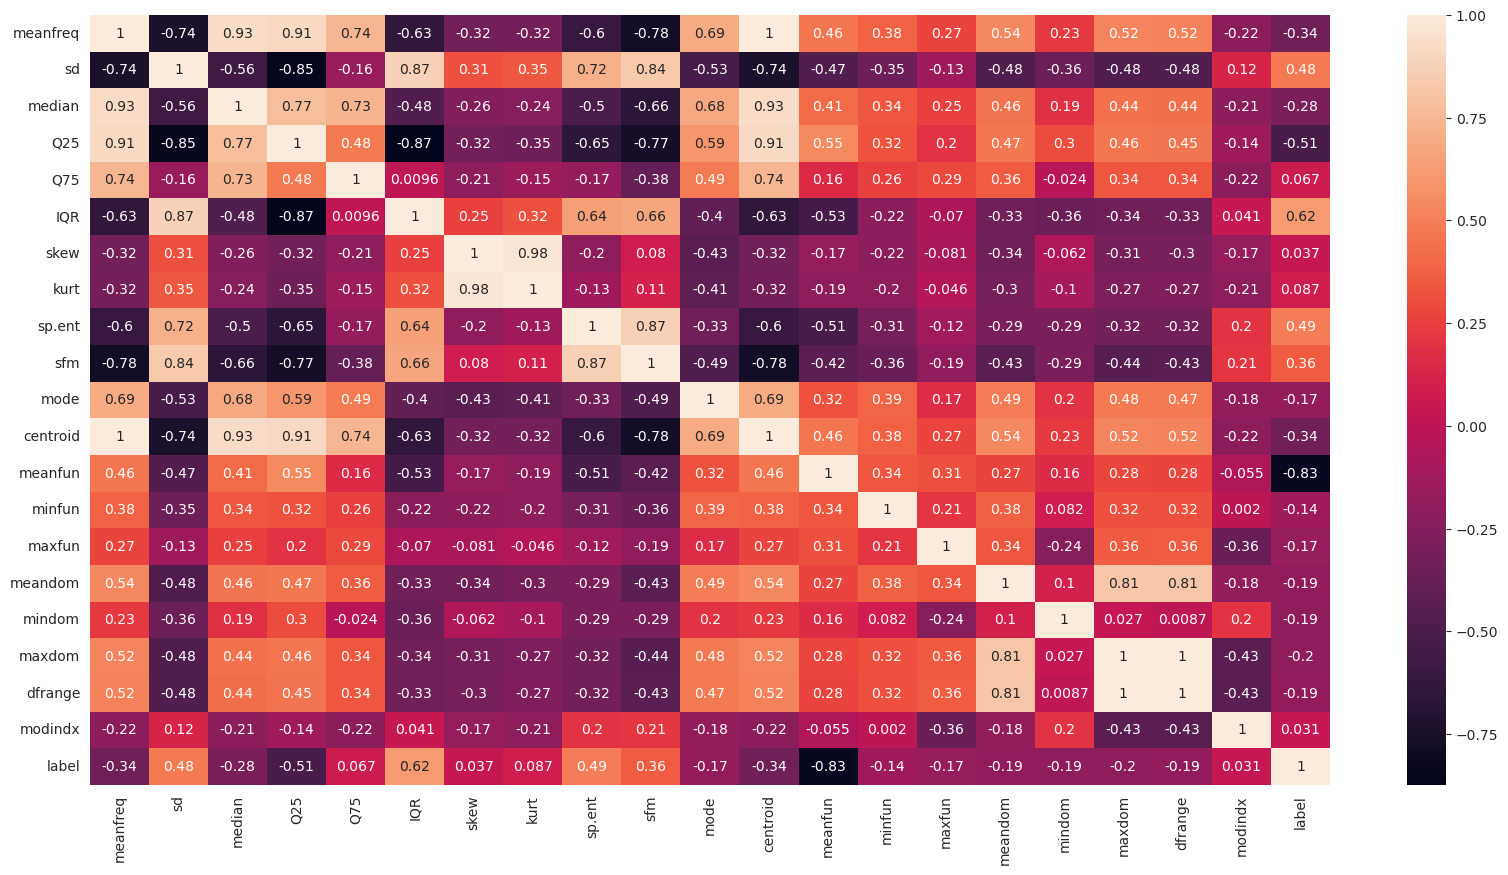

In [71]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [72]:
x = df.drop('label', axis=1)
y = df['label']

In [73]:
std = StandardScaler()
x = std.fit_transform(x)
x

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
model = SVC(kernel='rbf', C=100)
model.fit(x_train, y_train)

SVC(C=100)

In [75]:
model.score(x_test, y_test)

from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       318
           1       0.98      0.99      0.98       316

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

    a. Menggunakan data spam.csv

    b. Fitur CountVectorizer dengan mengaktifkan stop_words

    c. Evaluasi hasilnya

In [76]:
data = pd.read_csv('assets/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [77]:
data = data.drop(data.iloc[:, 2:], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [78]:
new_cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}
data = data.rename(columns=new_cols)

data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [79]:
data['Labels'] = le.fit_transform(data['Labels'])
data.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [80]:
X = data['SMS'].values
y = data['Labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_bow = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_bow = accuracy_score(y_train, y_train_pred_bow)

# Prediksi dengan data test
y_test_pred_bow = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_bow = accuracy_score(y_test, y_test_pred_bow)

# Laporan klasifikasi
report_bow = classification_report(y_test, y_test_pred_bow)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_bow *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test_bow *100:.2f}%')

Hasil akurasi data train: 99.46%
Hasil akurasi data test: 98.39%



    3. Buatlah model klasifikasi Multinomial Naive Bayes dengan ketentuan,
       a. Menggunakan spam.csv
       b. Fitur TF-IDF dengan mengaktifkan stop_words
       c. Evaluasi hasilnya dan badingkan dengan hasil pada Tugas no 2.
       d. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tf_idf = TfidfVectorizer(stop_words='english')

X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_tf_idf = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_tf_idf = accuracy_score(y_train, y_train_pred_tf_idf)

# Prediksi dengan data test
y_test_pred_tf_idf = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_tf_idf = accuracy_score(y_test, y_test_pred_tf_idf)

# Laporan klasifikasi
report_tf_idf = classification_report(y_test, y_test_pred_tf_idf)

# Print perbandingan hasil evaluasi
print(f'Hasil akurasi data train menggunakan TF-IDF: {acc_train_tf_idf*100:.2f}%')
print(f'Hasil akurasi data train menggunakan CrossVectorizer: {acc_train_bow*100:.2f}%')
print(f'Hasil akurasi data test menggunakan TF-IDF: {acc_test_tf_idf*100:.2f}%')
print(f'Hasil akurasi data test menggunakan CrossVectorizer: {acc_test_bow*100:.2f}%')

# Print laporan klasifikasi data test
print('\n')
print(f'Laporan klasifikasi data test menggunakan TF-IDF\n {report_tf_idf}\n')
print(f'Laporan klasifikasi data test menggunakan CrossVectorizer\n {report_bow}')


Hasil akurasi data train menggunakan TF-IDF: 98.38%
Hasil akurasi data train menggunakan CrossVectorizer: 99.46%
Hasil akurasi data test menggunakan TF-IDF: 96.68%
Hasil akurasi data test menggunakan CrossVectorizer: 98.39%


Laporan klasifikasi data test menggunakan TF-IDF
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Laporan klasifikasi data test menggunakan CrossVectorizer
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

